In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':18})


In [19]:
df = pd.read_csv('../data/metadata/2020-05-14_pg1_3_all.csv')
df.head()

,Unnamed: 0,listing_id,image_file,prop_type,listing_price,beds,baths,sqft,address,city,state,zipcode
0,0,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m1108769346x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
1,1,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m867679501xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
2,2,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2412943192x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
3,3,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m2841480592x...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015
4,4,Aurora_CO_1_0,ffaa50edd5566d5dcfe0b1d132ad079cl-m758422910xd...,House for Sale,"$265,000",3,1,854,4614-S-Buckley-Way,Aurora,CO,80015


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4751 non-null   int64 
 1   listing_id     4751 non-null   object
 2   image_file     4751 non-null   object
 3   prop_type      4751 non-null   object
 4   listing_price  4751 non-null   object
 5   beds           4751 non-null   object
 6   baths          4751 non-null   object
 7   sqft           4751 non-null   object
 8   address        4751 non-null   object
 9   city           4751 non-null   object
 10  state          4751 non-null   object
 11  zipcode        4751 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 445.5+ KB


In [21]:
count_by_city = df.groupby('city').count()['image_file']
count_by_city



city
Arvada          726
Aurora          666
Broomfield       45
Centennial      571
Denver         1148
Englewood        33
Lakewood        634
Littleton        40
Thornton        441
Westminster     447
Name: image_file, dtype: int64

[Text(0, 0, 'Denver'),
 Text(0, 0, 'Arvada'),
 Text(0, 0, 'Aurora'),
 Text(0, 0, 'Lakewood'),
 Text(0, 0, 'Centennial'),
 Text(0, 0, 'Westminster'),
 Text(0, 0, 'Thornton'),
 Text(0, 0, 'Broomfield'),
 Text(0, 0, 'Littleton'),
 Text(0, 0, 'Englewood')]

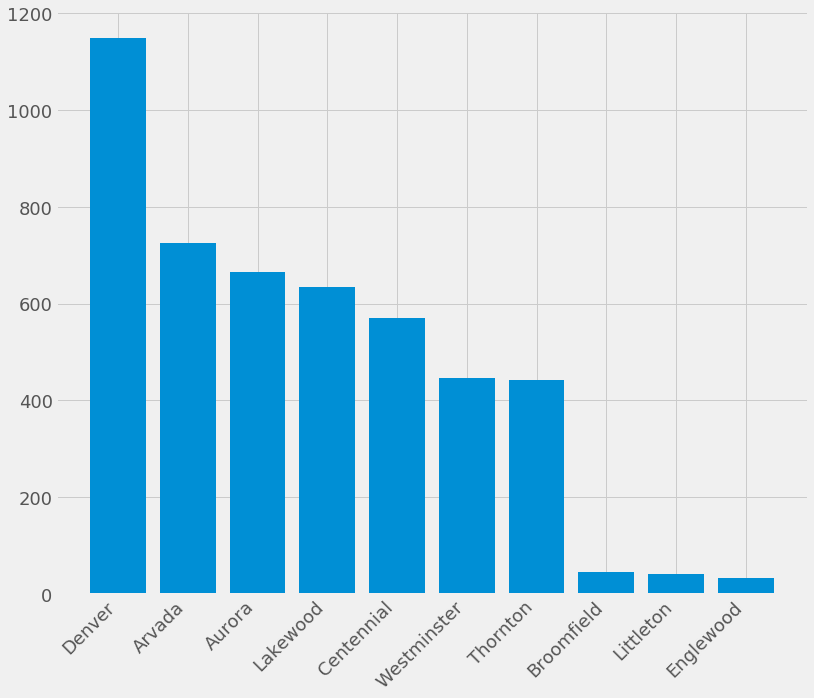

In [22]:
# dist of collected listings
desc_idx = np.argsort(count_by_city.values)
desc_y = count_by_city.values[desc_idx][::-1]
desc_x = count_by_city.index[desc_idx][::-1]


fig, ax = plt.subplots(1,figsize=(12,10))
ax.bar(desc_x, desc_y)
ax.set_xticklabels(desc_x, rotation=45, ha='right')

array([ 33,  40,  45, 293, 310, 312, 348, 388, 412, 610])